In [1]:
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import os.path

In [3]:
adir = 'classification_preds/'

In [4]:
hemis = ['lh','rh']
early_roi = ['V1v','V1d','V2v','V2d','V3v','V3d','hV4']
late_roi = ['EBA','FBA-1','FBA-2','OFA','FFA-1','FFA-2','OPA','PPA','RSC','OWFA','VFWFA-1','VFWFA-2',
            'mfs-words','mTL-bodies','mTL-faces','mTL-words','aTL-faces']

late_body_roi = ['EBA','FBA-1','FBA-2','mTL-bodies']
late_face_roi = ['OFA','FFA-1','FFA-2','mTL-faces','aTL-faces']
late_place_roi = ['OPA','PPA','RSC']
late_word_roi = ['OWFA','VFWFA-1','VFWFA-2','mfs-words','mTL-words']

roi_group_dict = {'early':early_roi,'body':late_body_roi,'face':late_face_roi,'place':late_place_roi,'word':late_word_roi}
roi_group_label = {'early':0,'body':1,'face':2,'place':3,'word':4}

subs = np.arange(1,8+1)
pooled_mods = ['havg']

In [5]:
types = ['untuned','subj']
types = ['untuned','subj','pooled']
types = ['untuned','subj','pooled','subj_reg']


dataset = 'caltech256'
dataset = 'imagenet'

#dataset = 'places365'

filename = dataset+'_test_labels.npy'
print(os.path.isfile(adir+filename))
test_labels = np.load(adir+filename)

model_labels = [-1]
model_names = ['Oracle']
count_of_preds = 1 
file_names = ['',]

for type in types:
    if type == 'untuned':
        type_dir = 'Untuned/'
        filename = type_dir+type+'_'+dataset+'_test_probs.npy'
        if os.path.isfile(adir+filename):
            count_of_preds +=1
            model_labels.append(-2)        
            model_names.append('Untuned')
            untuned_test_probs = np.load(adir+filename)
            file_names.append(adir+filename)
    else:
        for hemi in hemis:
            for roi_group in roi_group_dict:
                for roi in roi_group_dict[roi_group]:
                    if type == 'subj':
                        for sub_ind in subs:        
                            type_dir = 'Subj'+str(sub_ind)+'/'
                            filename = type_dir+type+str(sub_ind)+'_'+hemi+'_'+roi+'_'+dataset+'_test_probs.npy'
                            if os.path.isfile(adir+filename):
                                count_of_preds +=1
                                model_labels.append(roi_group_label[roi_group])
                                model_names.append('Subject'+str(sub_ind)+'_'+hemi+'_'+roi)        
                                file_names.append(adir+filename)
                    if type == 'subj_reg':
                        for sub_ind in subs:        
                            type_dir = 'Subj'+str(sub_ind)+'/'
                            filename = type_dir+type.split('_')[0]+str(sub_ind)+'_'+hemi+'_'+roi+'_'+dataset+'_reg_test_probs.npy'
                            if os.path.isfile(adir+filename):
                                count_of_preds +=1
                                model_labels.append(roi_group_label[roi_group])
                                model_names.append('RegSubject'+str(sub_ind)+'_'+hemi+'_'+roi)        
                                file_names.append(adir+filename)
                    if type == 'pooled':        
                        type_dir = 'Pooled/'
                        for mod in pooled_mods:
                            filename = type_dir+hemi+'_'+roi+'_'+type+'_'+mod+'_'+dataset+'_test_probs.npy'
                            if os.path.isfile(adir+filename):
                                count_of_preds +=1
                                model_labels.append(roi_group_label[roi_group])
                                model_names.append('Pooled_'+mod+'_'+hemi+'_'+roi) 
                                file_names.append(adir+filename)

print(count_of_preds,model_labels)
label_base = -1
# fix messed up ordering 
file_names.pop(0)
file_names.pop(0)

l0=model_labels.pop(0)
l1=model_labels.pop(0)
model_labels.append(l1)
model_labels.append(l0)
model_labels = np.array(model_labels)

l0=model_names.pop(0)
l1=model_names.pop(0)
model_names.append(l1)
model_names.append(l0)

print(model_labels)

True
600 [-1, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [6]:
model_names

['Subject1_lh_V1v',
 'Subject2_lh_V1v',
 'Subject3_lh_V1v',
 'Subject4_lh_V1v',
 'Subject5_lh_V1v',
 'Subject6_lh_V1v',
 'Subject7_lh_V1v',
 'Subject8_lh_V1v',
 'Subject1_lh_V1d',
 'Subject2_lh_V1d',
 'Subject3_lh_V1d',
 'Subject4_lh_V1d',
 'Subject5_lh_V1d',
 'Subject6_lh_V1d',
 'Subject7_lh_V1d',
 'Subject8_lh_V1d',
 'Subject1_lh_V2v',
 'Subject2_lh_V2v',
 'Subject3_lh_V2v',
 'Subject4_lh_V2v',
 'Subject5_lh_V2v',
 'Subject6_lh_V2v',
 'Subject7_lh_V2v',
 'Subject8_lh_V2v',
 'Subject1_lh_V2d',
 'Subject2_lh_V2d',
 'Subject3_lh_V2d',
 'Subject4_lh_V2d',
 'Subject5_lh_V2d',
 'Subject6_lh_V2d',
 'Subject7_lh_V2d',
 'Subject8_lh_V2d',
 'Subject1_lh_V3v',
 'Subject2_lh_V3v',
 'Subject3_lh_V3v',
 'Subject4_lh_V3v',
 'Subject5_lh_V3v',
 'Subject6_lh_V3v',
 'Subject7_lh_V3v',
 'Subject8_lh_V3v',
 'Subject1_lh_V3d',
 'Subject2_lh_V3d',
 'Subject3_lh_V3d',
 'Subject4_lh_V3d',
 'Subject5_lh_V3d',
 'Subject6_lh_V3d',
 'Subject7_lh_V3d',
 'Subject8_lh_V3d',
 'Subject1_lh_hV4',
 'Subject2_lh_hV4',


In [7]:
pred_shape = untuned_test_probs.shape
model_acc =  np.zeros(count_of_preds)

for i,fname in enumerate(file_names):
    test_probs = np.lib.format.open_memmap(fname,mode='r')   
    model_acc[i] = np.mean(test_labels == np.argmax(test_probs, axis=1))
#    for j in range(pred_shape[0]):
#        model_acc[i] += 1/pred_shape[0]*(test_labels[j]==np.argmax(test_probs[j]))
    print(model_names[i],model_acc[i])        

#untuned
model_acc[-2] =  np.mean(test_labels == np.argmax(untuned_test_probs, axis=1))

# oracle
n_class = untuned_test_probs.shape[1]
oracle_smooth_factor = 0.01 # Is this used in prior work?
smoothed_oracle = oracle_smooth_factor*1/n_class+(1-oracle_smooth_factor)*(
    test_labels[:,np.newaxis] == np.arange(n_class)[np.newaxis,:])
model_acc[-1] =  np.mean(test_labels == np.argmax(smoothed_oracle, axis=1))

for i in range(count_of_preds):
    print(model_names[i],model_acc[i])

Subject1_lh_V1v 0.2864
Subject2_lh_V1v 0.3364
Subject3_lh_V1v 0.34773333333333334
Subject4_lh_V1v 0.3565333333333333
Subject5_lh_V1v 0.3586666666666667
Subject6_lh_V1v 0.38306666666666667
Subject7_lh_V1v 0.3692
Subject8_lh_V1v 0.38026666666666664
Subject1_lh_V1d 0.2670666666666667
Subject2_lh_V1d 0.31146666666666667
Subject3_lh_V1d 0.3764
Subject4_lh_V1d 0.3704
Subject5_lh_V1d 0.3768
Subject6_lh_V1d 0.3857333333333333
Subject7_lh_V1d 0.35573333333333335
Subject8_lh_V1d 0.372
Subject1_lh_V2v 0.356
Subject2_lh_V2v 0.3450666666666667
Subject3_lh_V2v 0.3893333333333333
Subject4_lh_V2v 0.376
Subject5_lh_V2v 0.37653333333333333
Subject6_lh_V2v 0.3837333333333333
Subject7_lh_V2v 0.36773333333333336
Subject8_lh_V2v 0.38466666666666666
Subject1_lh_V2d 0.3566666666666667
Subject2_lh_V2d 0.3777333333333333
Subject3_lh_V2d 0.3972
Subject4_lh_V2d 0.3937333333333333
Subject5_lh_V2d 0.3930666666666667
Subject6_lh_V2d 0.404
Subject7_lh_V2d 0.3834666666666667
Subject8_lh_V2d 0.40386666666666665
Subject

In [8]:
for i,fname in enumerate(file_names):
    if model_names[i][0]=='R':    
        test_probs = np.lib.format.open_memmap(fname,mode='r')   
        model_acc[i] = np.mean(test_labels == np.argmax(test_probs, axis=1))
    #    for j in range(pred_shape[0]):
    #        model_acc[i] += 1/pred_shape[0]*(test_labels[j]==np.argmax(test_probs[j]))
        print(model_names[i],model_acc[i], np.sum(1==np.max(test_probs,axis=1)))       
        

RegSubject1_lh_V1v 0.12893333333333334 23
RegSubject2_lh_V1v 0.1228 55
RegSubject3_lh_V1v 0.12453333333333333 34
RegSubject4_lh_V1v 0.12973333333333334 38
RegSubject5_lh_V1v 0.13146666666666668 22
RegSubject6_lh_V1v 0.12533333333333332 25
RegSubject7_lh_V1v 0.1264 31
RegSubject8_lh_V1v 0.11586666666666667 29
RegSubject1_lh_V1d 0.12906666666666666 41
RegSubject2_lh_V1d 0.13746666666666665 34
RegSubject3_lh_V1d 0.12853333333333333 30
RegSubject4_lh_V1d 0.13106666666666666 33
RegSubject5_lh_V1d 0.13733333333333334 41
RegSubject6_lh_V1d 0.13066666666666665 34
RegSubject7_lh_V1d 0.13133333333333333 35
RegSubject8_lh_V1d 0.13213333333333332 25
RegSubject1_lh_V2v 0.14733333333333334 44
RegSubject2_lh_V2v 0.13706666666666667 42
RegSubject3_lh_V2v 0.12426666666666666 25
RegSubject4_lh_V2v 0.14093333333333333 30
RegSubject5_lh_V2v 0.13053333333333333 36
RegSubject6_lh_V2v 0.1344 36
RegSubject7_lh_V2v 0.13653333333333334 39
RegSubject8_lh_V2v 0.13013333333333332 39
RegSubject1_lh_V2d 0.1548 34
Re

In [9]:
pointer_list = []
for j,fname in enumerate(file_names):
    pointer_list.append(np.lib.format.open_memmap(fname,mode='r'))   



In [10]:
D2 = np.zeros((count_of_preds,count_of_preds))
P_i = np.zeros((count_of_preds,pred_shape[1]))
n_test = pred_shape[0]
for i in range(n_test):
    for j,p in enumerate(pointer_list):
        P_i[j] = p[i]
        if model_names[j][0]=='R':
            P_i[j] = oracle_smooth_factor*1/n_class+(1-oracle_smooth_factor)*P_i[j] 
    P_i[-1] = smoothed_oracle[i]
    P_i[-2] = untuned_test_probs[i]
    P12 = np.sqrt(P_i)
    D2 += 1/n_test*(-np.log(P12@P12.T))
    if np.mod(i,1000)==0:
        print(i,n_test)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
0 7500
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instruc

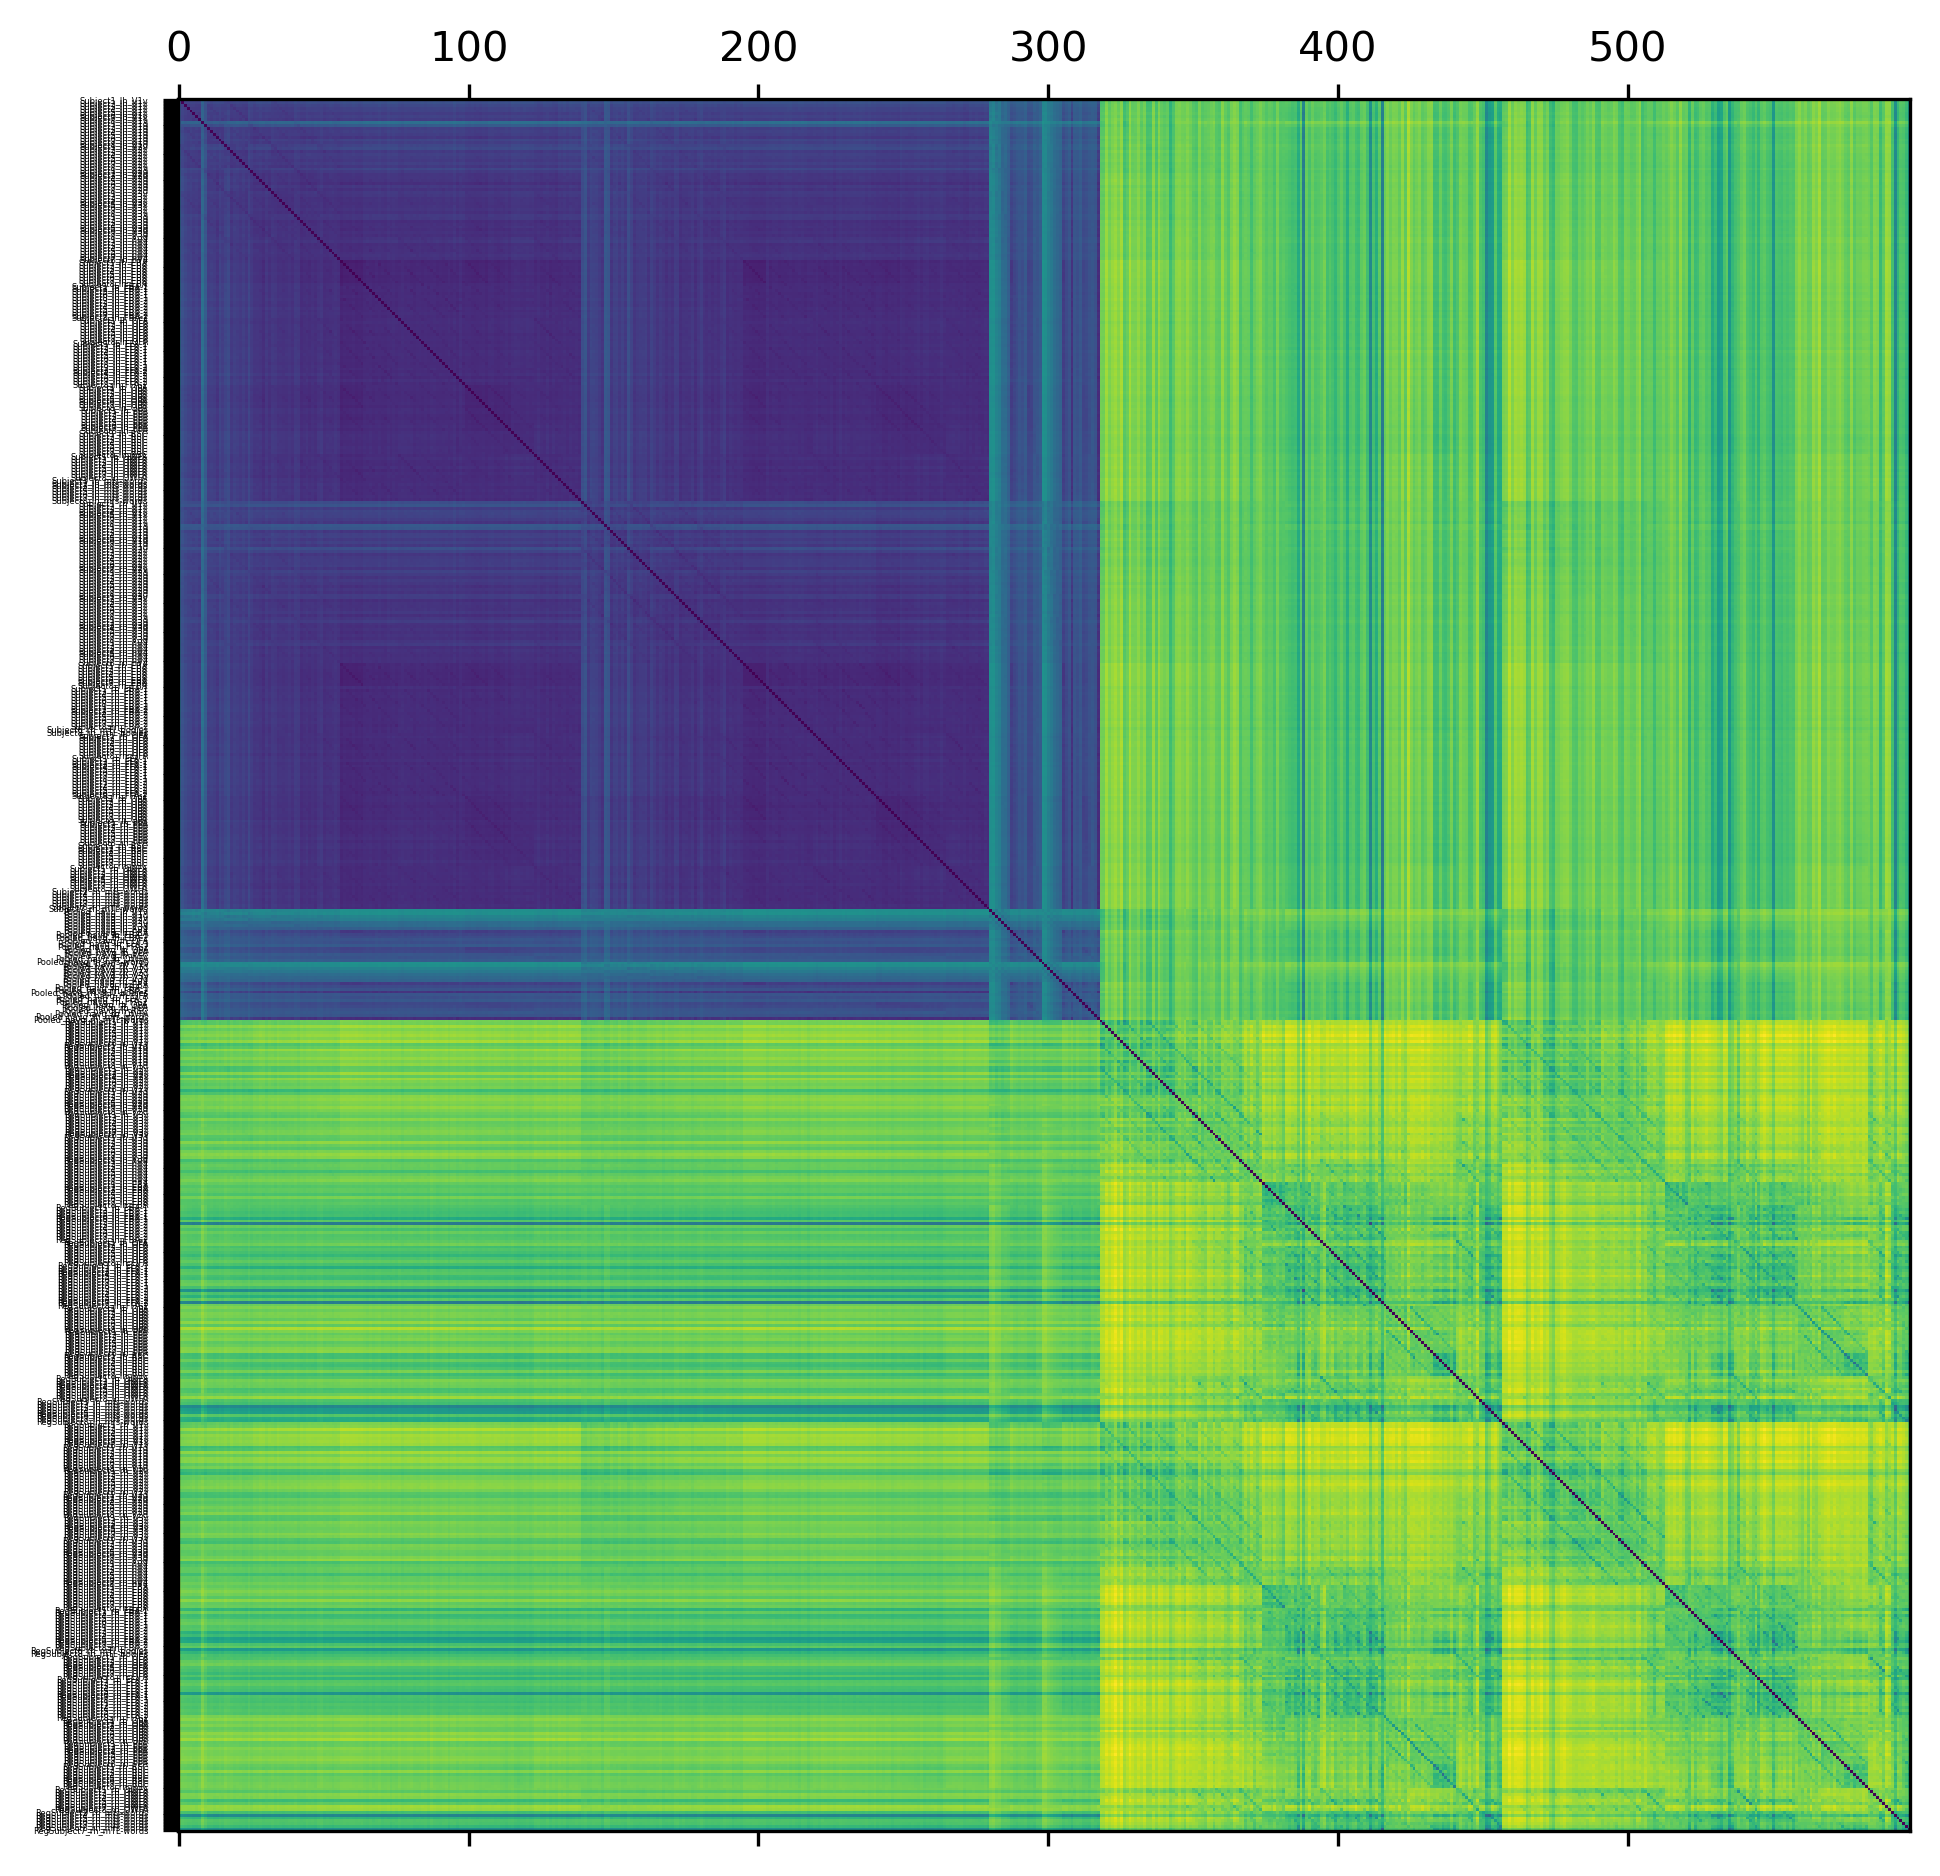

In [11]:
fig = plt.figure(figsize=(7.5, 7.5), dpi=300)
ax = fig.add_subplot()
ax.matshow(D2[:-2,:-2])
plt.yticks(np.arange(count_of_preds-2),labels=model_names[:-2],fontsize=2)
plt.show()

In [12]:
print(np.min(D2),np.sum(np.isnan(D2)),np.sum(np.isinf(D2)))


-4.3128463763269043e-16 0 0


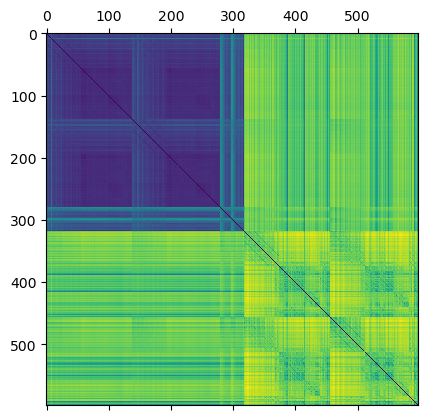

In [13]:
plt.matshow(D2[:-2,:-2])

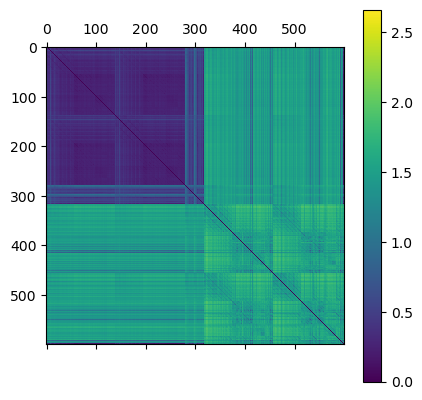

In [14]:
plt.matshow(D2)
plt.colorbar()

In [15]:
letter2type = {'U':-2,'S':1,'R':1.5, 'P':2,'O':-1}
model_type = np.array( [ letter2type[n[0]] for n in model_names])

In [16]:
new_model_labels = 1.0*model_labels
new_model_labels[model_labels==0] += 0.5*np.array(['_rh_' in model_names[i] for i in np.flatnonzero(model_labels==0)])
# left versus right


markers = {0: '<', 0.5:'>', 1:'^', 2:'o', 3:'s', 4:'v' ,-2:'*',-1:'D'}
model_strs ={0: 'Early-L',0.5:'Early-R', 1:'Body', 2:'Face', 3:'Place', 4:'Word' ,-2:'Untuned',-1:'Oracle'}



In [17]:
early_model_labels = 1.0*model_labels

early_model_labels[model_labels==0] += 5*np.array(['_rh_' in model_names[i] for i in np.flatnonzero(model_labels==0)])

early_model_labels += 0.1*np.array(['V1d' in m for m in model_names])
early_model_labels += 0.2*np.array(['V2' in m for m in model_names])
early_model_labels += 0.3*np.array(['V3' in m for m in model_names])
early_model_labels += 0.4*np.array(['hV4' in m for m in model_names])


early_markers = {0.0: '<',
                 5.0:'>',
                 0.1:'<',
                 5.1:'>',
                 0.2:'<',
                 5.2:'>',
                 0.3:'<',
                 5.3:'>',
                 0.4:'<',
                 5.4:'>',
                 1:'^', 2:'o', 3:'s', 4:'v' ,-2:'*',-1:'D'}
early_model_strs ={0.0: 'V1v-L',
                   5.0: 'V1v-R',
                   0.1: 'V1d-L',
                   5.1: 'V1d-R',
                   0.2: 'V2-L',
                   5.2: 'V2-R',
                   0.3: 'V3-L',
                   5.3: 'V3-R',
                   0.4: 'hV4-L',
                   5.4: 'hV4-R',
                   1:'Body', 2:'Face', 3:'Place', 4:'Word' ,-2:'Untuned',-1:'Oracle'}

np.sum(np.unique(early_model_labels)[:,np.newaxis]==early_model_labels[np.newaxis,:],axis=1)

array([  1,   1,  17,  17,  34,  34,  17,  95,  96, 102,  67,  17,  17,
        34,  34,  17])

0 56
0.5 56
1 44
2 45
3 48
4 31
-2 1
-1 1


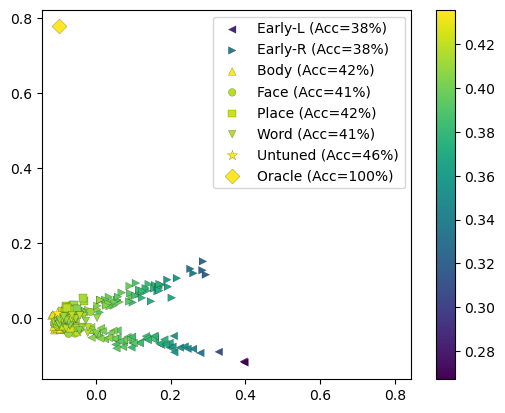

In [18]:
keep_models = (model_type != 1.5 ) & ( model_type != 2)


D0 = np.maximum(0,D2[keep_models][:,keep_models]) # numeric error for small negatives
color_val = model_acc[keep_models]
use_for_color = keep_models
vmin, vmax = min(model_acc[use_for_color]), max(model_acc[use_for_color])


C = (D0-np.mean(D0,axis=0,keepdims=True))
C -= np.mean(C,axis=1,keepdims=True)

eigva, eigve = np.linalg.eigh(-0.5*C)

v = np.argsort(eigva)[::-1]

Z = eigve[:,v[0:2]]@np.diag(np.sqrt(eigva[v[0:2]]))

vmin, vmax = min(color_val), max(color_val[:-2])


for _,k in enumerate(markers):
    idx=new_model_labels[keep_models]==k
    print(k,np.sum(idx))
    idx2 = 0*idx
    if k==-1:
        marker_size=58
    elif k==-2:
        marker_size=58
    else:
        idx_pooled = model_type[keep_models] == 2
        marker_size=30
    label_add = ' (Acc={:0.0f}%)'.format(100*np.mean(model_acc[keep_models][idx]))
    plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=color_val[idx],marker=markers[k],label=model_strs[k]+label_add,vmin=vmin,vmax=vmax,edgecolors='k',linewidth=0.125)
    if k>=0:
        plt.scatter(Z[idx_pooled & idx ,0],Z[idx_pooled& idx ,1],s=marker_size,c=color_val[idx_pooled & idx ],marker=markers[k],vmin=vmin,vmax=vmax,edgecolors='m',linewidth=0.5)

    
plt.axis('square')
plt.colorbar()
plt.legend()

plt.savefig(adir+'overall_landscape.pdf',  bbox_inches='tight')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


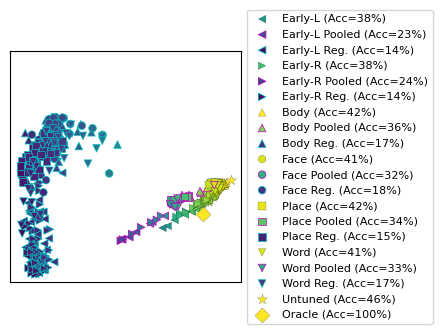

In [19]:
keep_models = (model_type != np.pi )


D0 = np.maximum(0,D2[keep_models][:,keep_models]) # numeric error for small negatives
color_val = model_acc[keep_models]
use_for_color = keep_models
vmin, vmax = min(model_acc[use_for_color]), max(model_acc[use_for_color])


C = (D0-np.mean(D0,axis=0,keepdims=True))
C -= np.mean(C,axis=1,keepdims=True)

eigva, eigve = np.linalg.eigh(-0.5*C)

v = np.argsort(eigva)[::-1]

Z = eigve[:,v[0:2]]@np.diag(np.sqrt(eigva[v[0:2]]))

vmin, vmax = min(color_val), max(color_val[:-2])
fig = plt.figure(figsize=(3,3))


for _,k in enumerate(markers):
    idx=new_model_labels[keep_models]==k
    print(k,np.sum(idx))
    idx2 = 0*idx
    if k==-1:
        marker_size=58
    elif k==-2:
        marker_size=58
    else:
        idx_subject = model_type == 1
        idx_pooled = model_type == 2
        idx_reg = model_type == 1.5
        marker_size=30
    if k>=0:
        label_add = ' (Acc={:0.0f}%)'.format(100*np.mean(model_acc[keep_models][idx & idx_subject]))
        plt.scatter(Z[idx_subject & idx,0],Z[idx_subject & idx,1],s=marker_size,c=color_val[idx_subject & idx],marker=markers[k],
                    label=model_strs[k]+label_add,vmin=vmin,vmax=vmax,edgecolors='k',linewidth=0.125)
        label_add = ' Pooled (Acc={:0.0f}%)'.format(100*np.mean(model_acc[keep_models][idx & idx_pooled]))
        plt.scatter(Z[idx_pooled & idx ,0],Z[idx_pooled& idx ,1],s=marker_size,c=color_val[idx_pooled & idx ],label=model_strs[k]+label_add,marker=markers[k],vmin=vmin,vmax=vmax,edgecolors='m',linewidth=0.5)
        label_add = ' Reg. (Acc={:0.0f}%)'.format(100*np.mean(model_acc[keep_models][idx & idx_reg]))
        plt.scatter(Z[idx_reg & idx ,0],Z[idx_reg& idx ,1],s=marker_size,c=color_val[idx_reg & idx ],label=model_strs[k]+label_add,marker=markers[k],vmin=vmin,vmax=vmax,edgecolors='c',linewidth=0.5)
    else:
        label_add = ' (Acc={:0.0f}%)'.format(100*np.mean(model_acc[keep_models][idx ]))
        plt.scatter(Z[ idx,0],Z[ idx,1],s=marker_size,c=color_val[ idx],marker=markers[k],
                    label=model_strs[k]+label_add,vmin=vmin,vmax=vmax,edgecolors='k',linewidth=0.125)
        
    
plt.axis('square')
#plt.colorbar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})
plt.xticks([])
plt.yticks([])

plt.savefig(adir+'overall_reg_landscape.pdf',  bbox_inches='tight')

0.0 8
5.0 8
0.1 8
5.1 8
0.2 16
5.2 16
0.3 16
5.3 16
0.4 8
5.4 8
1 44
2 45
3 48
4 31
-2 1
-1 0


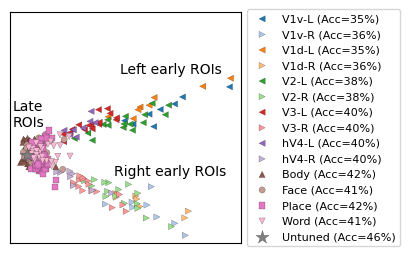

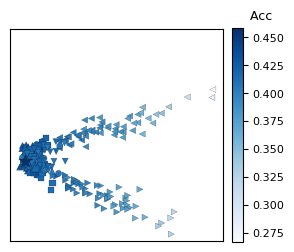

In [20]:
keep_models = (model_labels != -1 )  & (model_type !=2) & (model_type !=1.5)
#keep_models =  (model_type !=2)


D0 = np.maximum(0,D2[keep_models][:,keep_models]) # numeric error for small negatives
color_val = model_acc[keep_models]
use_for_color =  keep_models#(model_labels != -1 )  & (model_type !=2)  & (model_type !=1.5)
vmin, vmax = min(model_acc[use_for_color]), max(model_acc[use_for_color])



C = (D0- np.mean(D0,axis=0,keepdims=True))
C -= np.mean(C,axis=1,keepdims=True)

eigva, eigve = np.linalg.eigh(-0.5*C)

v = np.argsort(eigva)[::-1]

Z = eigve[:,v[0:2]]@np.diag(np.sqrt(eigva[v[0:2]]))

fig = plt.figure(figsize=(3,3))
for i,k in enumerate(early_markers):
    idx=early_model_labels[keep_models]==k   
    print(k,np.sum(idx))
    if np.sum(idx)>0:
        if k==-1:
            marker_size=58
        elif k==-2:
            marker_size=100
        else:
            marker_size=20
            
        label_add = ' (Acc={:0.0f}%)'.format(100*np.mean(model_acc[keep_models][idx]))
        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=i*np.ones(np.sum(idx)),marker=early_markers[k],label=early_model_strs[k]+label_add,vmin=0,vmax=20,cmap='tab20',edgecolors='k',linewidth=0.125)
#plt.legend()#loc='lower right')


plt.text(0.25,0.2, 'Left early ROIs',ha='center')
plt.text(0.25,-0.05, 'Right early ROIs',ha='center')
plt.text(-0.1,0.07, 'Late\nROIs',ha='center')

plt.xticks([])
plt.yticks([])

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})


plt.axis('square')



plt.savefig(adir+'subject_landscape_key.pdf',  bbox_inches='tight')

fig = plt.figure(figsize=(3,3))
for _,k in enumerate(early_markers):
    idx=early_model_labels[keep_models]==k
    if np.sum(idx)>0:
        if k==-1:
            marker_size=58
        elif k==-2:
            marker_size=100
        else:
            marker_size=20
        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=color_val[idx],cmap='Blues',marker=early_markers[k],label=early_model_strs[k]+label_add,vmin=vmin,vmax=vmax,edgecolors='k',linewidth=0.125)
plt.axis('square')
plt.xticks([])
plt.yticks([])

cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=8) 
cbar.ax.set_title("            Acc",fontsize=9)

plt.savefig(adir+'subject_landscape.pdf',  bbox_inches='tight')

0.0 8
5.0 8
0.1 8
5.1 8
0.2 16
5.2 16
0.3 16
5.3 16
0.4 8
5.4 8
1 44
2 45
3 48
4 31
-2 1
-1 0


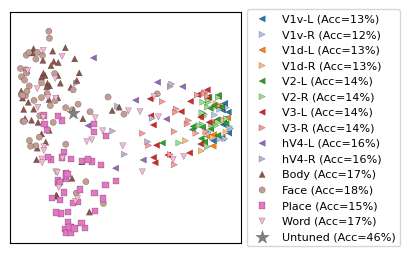

In [21]:
keep_models = (model_labels != -1 )  & (model_type !=2) & (model_type !=1)
#keep_models =  (model_type !=2)


D0 = np.maximum(0,D2[keep_models][:,keep_models]) # numeric error for small negatives
color_val = model_acc[keep_models]
#use_for_color = (model_labels != -2 )  & (model_labels != -1 )  & (model_type !=2)
#vmin, vmax = min(model_acc[use_for_color]), max(model_acc[use_for_color])



C = (D0- np.mean(D0,axis=0,keepdims=True))
C -= np.mean(C,axis=1,keepdims=True)

eigva, eigve = np.linalg.eigh(-0.5*C)

v = np.argsort(eigva)[::-1]

Z = eigve[:,v[0:2]]@np.diag(np.sqrt(eigva[v[0:2]]))

fig = plt.figure(figsize=(3,3))
for i,k in enumerate(early_markers):
    idx=early_model_labels[keep_models]==k   
    print(k,np.sum(idx))
    if np.sum(idx)>0:
        if k==-1:
            marker_size=58
        elif k==-2:
            marker_size=100
        else:
            marker_size=20
            
        label_add = ' (Acc={:0.0f}%)'.format(100*np.mean(model_acc[keep_models][idx]))
        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=i*np.ones(np.sum(idx)),marker=early_markers[k],label=early_model_strs[k]+label_add,vmin=0,vmax=20,cmap='tab20',edgecolors='k',linewidth=0.125)
#plt.legend()#loc='lower right')

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})

plt.xticks([])
plt.yticks([])

plt.axis('square')

plt.savefig(adir+'subject_reg_landscape_key.pdf',  bbox_inches='tight')
# fig = plt.figure()
# for _,k in enumerate(early_markers):
#     idx=early_model_labels[keep_models]==k
#     if np.sum(idx)>0:
#         if k==-1:
#             marker_size=58
#         elif k==-2:
#             marker_size=100
#         else:
#             marker_size=20
#         plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=color_val[idx],marker=early_markers[k],label=early_model_strs[k]+label_add,vmin=vmin,vmax=vmax,edgecolors='k',linewidth=0.125)
# plt.axis('square')
# plt.colorbar()


# plt.savefig(adir+'subject_reg_landscape.eps', format='eps')

0.0 8
5.0 8
0.1 8
5.1 8
0.2 16
5.2 16
0.3 16
5.3 16
0.4 8
5.4 8
1 0
2 0
3 0
4 0
-2 1
-1 0


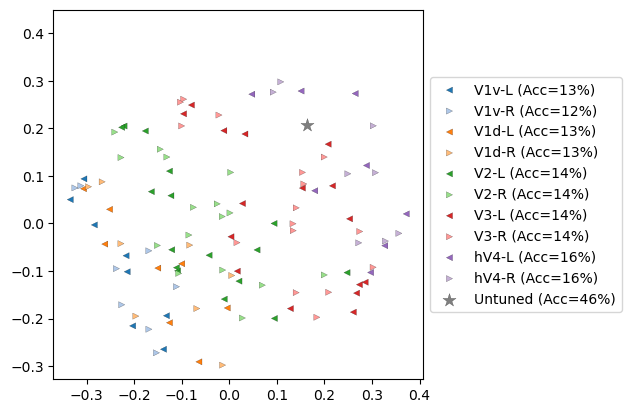

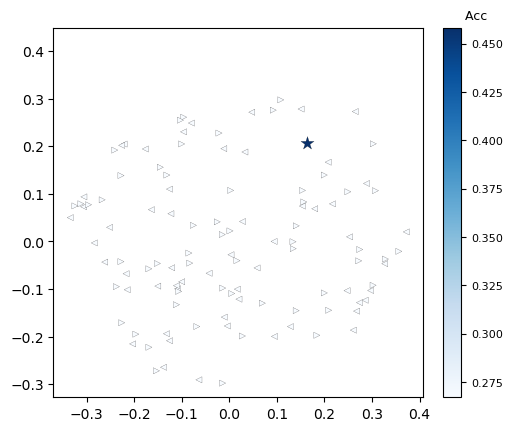

In [22]:
keep_models = (model_labels != -1 )  & (model_type !=2) & (model_type !=1)

keep_models &= (model_labels <1 ) | (model_labels >=5 )
#keep_models =  (model_type !=2)


D0 = np.maximum(0,D2[keep_models][:,keep_models]) # numeric error for small negatives
color_val = model_acc[keep_models]
# use_for_color = (model_labels != -2 )  & (model_labels != -1 )  & (model_type !=2)
# vmin, vmax = min(model_acc[use_for_color]), max(model_acc[use_for_color])



C = (D0- np.mean(D0,axis=0,keepdims=True))
C -= np.mean(C,axis=1,keepdims=True)

eigva, eigve = np.linalg.eigh(-0.5*C)

v = np.argsort(eigva)[::-1]

Z = eigve[:,v[0:2]]@np.diag(np.sqrt(eigva[v[0:2]]))

fig = plt.figure()
for i,k in enumerate(early_markers):
    idx=early_model_labels[keep_models]==k   
    print(k,np.sum(idx))
    if np.sum(idx)>0:
        if k==-1:
            marker_size=58
        elif k==-2:
            marker_size=100
        else:
            marker_size=20
            
        label_add = ' (Acc={:0.0f}%)'.format(100*np.mean(model_acc[keep_models][idx]))
        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=i*np.ones(np.sum(idx)),marker=early_markers[k],label=early_model_strs[k]+label_add,vmin=0,vmax=20,cmap='tab20',edgecolors='k',linewidth=0.125)
#plt.legend()#loc='lower right')

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('square')

plt.savefig(adir+'subject_reg_early_landscape_key.pdf',  bbox_inches='tight')

fig = plt.figure()
for _,k in enumerate(early_markers):
    idx=early_model_labels[keep_models]==k
    if np.sum(idx)>0:
        if k==-1:
            marker_size=58
        elif k==-2:
            marker_size=100
        else:
            marker_size=20
        plt.scatter(Z[idx,0],Z[idx,1],cmap="Blues",s=marker_size,c=color_val[idx],marker=early_markers[k],label=early_model_strs[k]+label_add,vmin=vmin,vmax=vmax,edgecolors='k',linewidth=0.125)
plt.axis('square')
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=8) 

cbar.ax.set_title("            Acc",fontsize=9)


plt.savefig(adir+'subject_reg_early_landscape.pdf',  bbox_inches='tight')

0.0 1
5.0 1
0.1 1
5.1 1
0.2 2
5.2 2
0.3 2
5.3 2
0.4 1
5.4 1
1 7
2 6
3 6
4 5
-2 1
-1 0


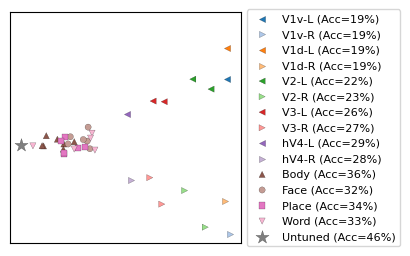

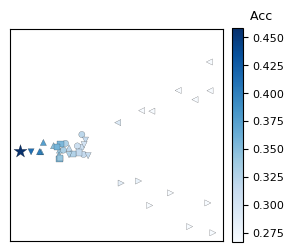

In [23]:
keep_models =  (model_type !=1) & (model_labels !=-1) & (model_type !=1.5)


D0 = np.maximum(0,D2[keep_models][:,keep_models]) # numeric error for small negatives
color_val = model_acc[keep_models]

# use_for_color = (model_labels != -2 )  & (model_labels != -1 )  & (model_type !=1) & (model_type !=1.5)
# vmin, vmax = min(model_acc[use_for_color]), max(model_acc[use_for_color])


C = (D0-np.mean(D0,axis=0,keepdims=True))
C -= np.mean(C,axis=1,keepdims=True)


eigva, eigve = np.linalg.eigh(-0.5*C)

v = np.argsort(eigva)[::-1]

Z = eigve[:,v[0:2]]@np.diag(np.sqrt(eigva[v[0:2]]))

fig = plt.figure(figsize=(3,3))

for i,k in enumerate(early_markers):
    idx=early_model_labels[keep_models]==k   
    print(k,np.sum(idx))
    if np.sum(idx)>0:
        if k==-1:
            marker_size=58
        elif k==-2:
            marker_size=100
        else:
            marker_size=20
            
        label_add = ' (Acc={:0.0f}%)'.format(100*np.mean(model_acc[keep_models][idx]))
        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=i*np.ones(np.sum(idx)),marker=early_markers[k],label=early_model_strs[k]+label_add,vmin=0,vmax=20,cmap='tab20',edgecolors='k',linewidth=0.125)


# for i,k in enumerate(markers):
#     idx=new_model_labels[keep_models]==k
#     if np.sum(idx)>0:
#         if k==-2:
#             marker_size=100
#             label_add = ''
#         else:
#             marker_size=20
#             label_add = ''
#         label_add = ' (Acc={:0.0f}%)'.format(100*np.mean(model_acc[keep_models][idx]))
#         plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=i*np.ones(np.sum(idx)),marker=markers[k],label=model_strs[k]+label_add,vmin=0,vmax=10,cmap='tab10_r',edgecolors='k',linewidth=0.125)


# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})

plt.axis('square')

plt.xticks([])
plt.yticks([])

plt.savefig(adir+'pooled_landscape_key.pdf',  bbox_inches='tight')

fig = plt.figure(figsize=(3,3))
for _,k in enumerate(markers):
    idx=new_model_labels[keep_models]==k
    if np.sum(idx)>0:
        if k==-1:
            marker_size=58
            label_add = ' (Acc=100%)'
        elif k==-2:
            marker_size=100
            label_add = ''
        else:
            marker_size=20
            label_add = ''
        plt.scatter(Z[idx,0],Z[idx,1],cmap='Blues',s=marker_size,c=color_val[idx],marker=markers[k],label=model_strs[k]+label_add,vmin=vmin,vmax=vmax,edgecolors='k',linewidth=0.125)
plt.axis('square')
plt.xticks([])
plt.yticks([])

cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=8) 
cbar.ax.set_title("            Acc",fontsize=9)


plt.savefig(adir+'pooled_landscape.pdf',  bbox_inches='tight')

(600,)


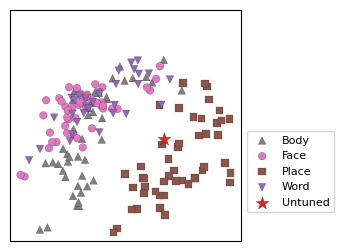

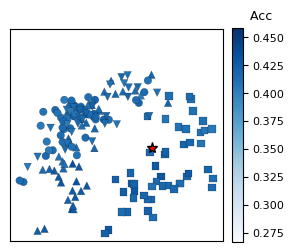

In [24]:
keep_models = (model_labels != 0) & (model_labels != -1) & (model_type !=2) & (model_type !=1.5)

D0 = np.maximum(0,D2[keep_models][:,keep_models]) # numeric error for small negatives
color_val = model_acc[keep_models]
print(keep_models.shape)

# use_for_color = (model_labels != -2 )  & (model_labels != -1 ) &(model_labels != 0) &  (model_type !=2)  &  (model_type !=1.5) 
# vmin, vmax = min(model_acc[use_for_color]), max(model_acc[use_for_color])



C = (D0-np.mean(D0,axis=0,keepdims=True))
C -= np.mean(C,axis=1,keepdims=True)

eigva, eigve = np.linalg.eigh(-0.5*C)

v = np.argsort(eigva)[::-1]

Z = eigve[:,v[0:2]]@np.diag(np.sqrt(eigva[v[0:2]]))

fig = plt.figure(figsize=(3,3))
for i,k in enumerate(markers):
    idx=model_labels[keep_models]==k
    if np.sum(idx)>0:
        if k==-2:
            marker_size=100
        else:
            marker_size=30
#        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=color_val[idx],marker=markers[k],label=model_strs[k]+label_add,vmin=vmin,vmax=vmax)
        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=i*np.ones(np.sum(idx)),marker=markers[k],label=model_strs[k],vmin=0,vmax=10,cmap='tab10_r',edgecolors='k',linewidth=0.125)
plt.legend(prop={'size': 8}, bbox_to_anchor=(1, 0.5))
plt.axis('square')
plt.xticks([])
plt.yticks([])

plt.savefig(adir+'higher_landscape_key.pdf',  bbox_inches='tight')

fig = plt.figure(figsize=(3,3))
for i,k in enumerate(markers):
    idx=new_model_labels[keep_models]==k
    if np.sum(idx)>0:
        if k==-2:
            marker_size=8
            # don't plot
            plt.plot(Z[idx,0],Z[idx,1],markersize=marker_size,c='r',marker=markers[k],label=model_strs[k]+label_add,markeredgecolor='k',linewidth=0.125)
        else:
            marker_size=30
            plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,cmap='Blues',c=color_val[idx],marker=markers[k],label=model_strs[k]+label_add,vmin=vmin,vmax=vmax,edgecolors='k',linewidth=0.125)

cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=8) 
cbar.ax.set_title("            Acc",fontsize=9)
plt.axis('square')
plt.xticks([])
plt.yticks([])

plt.savefig(adir+'higher_landscape.pdf',  bbox_inches='tight')

(600,)


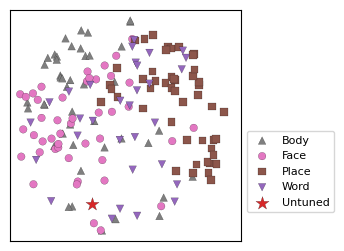

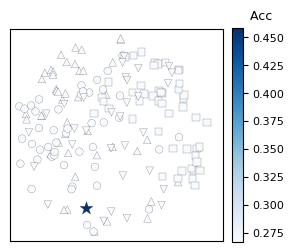

In [25]:
keep_models = (model_labels != 0) & (model_labels != -1) & (model_type !=2) & (model_type !=1)

D0 = np.maximum(0,D2[keep_models][:,keep_models]) # numeric error for small negatives
color_val = model_acc[keep_models]
print(keep_models.shape)

# use_for_color = (model_labels != -2 )  & (model_labels != -1 ) &(model_labels != 0) &  (model_type !=2) &  (model_type !=1) 
# vmin, vmax = min(model_acc[use_for_color]), max(model_acc[use_for_color])



C = (D0-np.mean(D0,axis=0,keepdims=True))
C -= np.mean(C,axis=1,keepdims=True)

eigva, eigve = np.linalg.eigh(-0.5*C)

v = np.argsort(eigva)[::-1]

Z = eigve[:,v[0:2]]@np.diag(np.sqrt(eigva[v[0:2]]))

fig = plt.figure(figsize=(3,3))
for i,k in enumerate(markers):
    idx=model_labels[keep_models]==k
    if np.sum(idx)>0:
        if k==-2:
            marker_size=100
        else:
            marker_size=30
#        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=color_val[idx],marker=markers[k],label=model_strs[k]+label_add,vmin=vmin,vmax=vmax)
        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=i*np.ones(np.sum(idx)),marker=markers[k],label=model_strs[k],vmin=0,vmax=10,cmap='tab10_r',edgecolors='k',linewidth=0.125)
plt.legend(prop={'size': 8}, bbox_to_anchor=(1, 0.5))
plt.axis('square')
plt.xticks([])
plt.yticks([])

plt.savefig(adir+'higher_reg_landscape_key.pdf',  bbox_inches='tight')

fig = plt.figure(figsize=(3,3))
for i,k in enumerate(markers):
    idx=new_model_labels[keep_models]==k
    if np.sum(idx)>0:
        if k==-2:
            marker_size=100
        else:
            marker_size=30
        plt.scatter(Z[idx,0],Z[idx,1],cmap='Blues',s=marker_size,c=color_val[idx],marker=markers[k],label=model_strs[k]+label_add,vmin=vmin,vmax=vmax,edgecolors='k',linewidth=0.125)


cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=8) 
cbar.ax.set_title("            Acc",fontsize=9)

plt.xticks([])
plt.yticks([])

plt.axis('square')

plt.savefig(adir+'higher_reg_landscape.pdf',  bbox_inches='tight')

In [26]:
from adjustText import adjust_text

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


(600,)


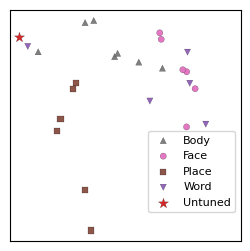

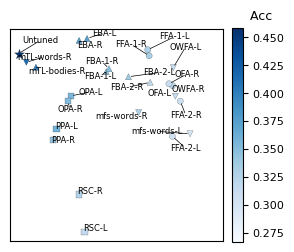

In [27]:
keep_models = (model_labels != 0) & (model_labels != -1) & (model_type !=1) & (model_type !=1.5)

D0 = np.maximum(0,D2[keep_models][:,keep_models]) # numeric error for small negatives
color_val = model_acc[keep_models]
print(keep_models.shape)

C = (D0-np.mean(D0,axis=0,keepdims=True))
C -= np.mean(C,axis=1,keepdims=True)

eigva, eigve = np.linalg.eigh(-0.5*C)

v = np.argsort(eigva)[::-1]

Z = eigve[:,v[0:2]]@np.diag(np.sqrt(eigva[v[0:2]]))

# vmin, vmax = min(color_val), max(color_val[:-2])

fig = plt.figure(figsize=(3,3))
for i,k in enumerate(markers):
    idx=model_labels[keep_models]==k
    if np.sum(idx)>0:
        if k==-2:
            marker_size=58
        else:
            marker_size=20
#        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=color_val[idx],marker=markers[k],label=model_strs[k]+label_add,vmin=vmin,vmax=vmax)
        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=i*np.ones(np.sum(idx)),marker=markers[k],label=model_strs[k],vmin=0,vmax=10,cmap='tab10_r',edgecolors='k',linewidth=0.125)
plt.legend(prop={'size': 8}, bbox_to_anchor=(1, 0.5))
plt.axis('square')
plt.xticks([])
plt.yticks([])

plt.savefig(adir+'higher_pooled_landscape_key.pdf',  bbox_inches='tight')


fig = plt.figure(figsize=(3,3))
texts = []
for i,k in enumerate(markers):
    idx=new_model_labels[keep_models]==k
    if np.sum(idx)>0:
        if k==-2:
            marker_size=58
        else:
            marker_size=20
        plt.scatter(Z[idx,0],Z[idx,1],cmap='Blues',s=marker_size,c=color_val[idx],marker=markers[k],label=model_strs[k]+label_add,vmin=vmin,vmax=vmax,edgecolors='k',linewidth=0.125)
        global_indices = np.flatnonzero(keep_models)[idx]
        local_indices = np.flatnonzero(idx)
        for li,gi in zip(local_indices,global_indices):
            parts = model_names[gi].split('_')
            if len(parts)==4:
                texts.append(plt.text(Z[li,0], Z[li,1],parts[-1]+'-'+parts[-2][0].upper(),fontsize=6))
            else:
                texts.append(plt.text(Z[li,0], Z[li,1],model_names[gi],fontsize=6))


adjust_text(texts, autoalign='xy', force_text=(1,2),time_lim=4,arrowprops=dict(arrowstyle='-', color='black', lw=0.5))


cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=8) 
cbar.ax.set_title("            Acc",fontsize=9)

plt.xticks([])
plt.yticks([])

plt.axis('square')
plt.savefig(adir+'higher_pooled_landscape.pdf',  bbox_inches='tight')


In [28]:
lr_model_labels = 1.0*model_labels
lr_model_labels += 0.5*np.array(['_rh_' in m for m in model_names])

lr_markers = {0: '<', 0.5:'>', 1:'^',1.5:'^', 2:'o', 2.5:'o', 3:'s', 3.5:'s', 4:'v', 4.5:'v' ,-2:'*',-1:'D'}
lr_model_strs ={0: 'Early-L',0.5:'Early-R', 1:'Body-L', 1.5:'Body-R', 2:'Face-L',2.5:'Face-R', 3:'Place-L',3.5:'Place-R',
             4:'Word-L',4.5:'Word-R' ,-2:'Untuned',-1:'Oracle'}



(600,)


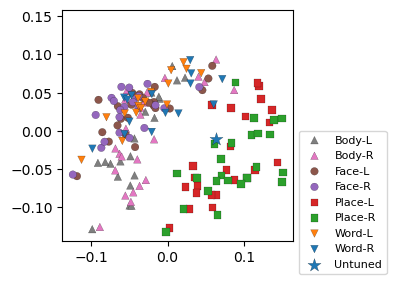

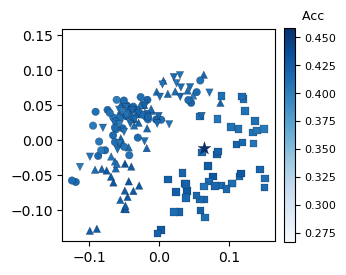

In [29]:
keep_models = (model_labels != 0) & (model_labels != -1) & (model_type !=2) & (model_type !=1.5)

D0 = np.maximum(0,D2[keep_models][:,keep_models]) # numeric error for small negatives
color_val = model_acc[keep_models]
print(keep_models.shape)

# use_for_color = (model_labels != -2 )  & (model_labels != -1 ) &(model_labels != 0) &  (model_type !=2) 
# vmin, vmax = min(model_acc[use_for_color]), max(model_acc[use_for_color])



C = (D0-np.mean(D0,axis=0,keepdims=True))
C -= np.mean(C,axis=1,keepdims=True)

eigva, eigve = np.linalg.eigh(-0.5*C)

v = np.argsort(eigva)[::-1]

Z = eigve[:,v[0:2]]@np.diag(np.sqrt(eigva[v[0:2]]))

fig = plt.figure(figsize=(3,3))
for i,k in enumerate(lr_markers):
    idx=lr_model_labels[keep_models]==k
    if np.sum(idx)>0:
        if k==-2:
            marker_size=100
        else:
            marker_size=30
#        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=color_val[idx],marker=markers[k],label=model_strs[k]+label_add,vmin=vmin,vmax=vmax)
        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=i*np.ones(np.sum(idx)),marker=lr_markers[k],
                    label=lr_model_strs[k],vmin=0,vmax=10,cmap='tab10_r',edgecolors='k',linewidth=0.125)
plt.legend(prop={'size': 8}, bbox_to_anchor=(1, 0.5))
plt.axis('square')

plt.savefig(adir+'higher_lr_landscape_key.pdf',  bbox_inches='tight')

fig = plt.figure(figsize=(3,3))
for i,k in enumerate(lr_markers):
    idx=lr_model_labels[keep_models]==k
    if np.sum(idx)>0:
        if k==-2:
            marker_size=100
        else:
            marker_size=30
        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=color_val[idx],marker=lr_markers[k],cmap="Blues",label=lr_model_strs[k]+label_add,vmin=vmin,vmax=vmax,edgecolors='k',linewidth=0.125)
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=8) 
cbar.ax.set_title("            Acc",fontsize=9)
plt.axis('square')

plt.savefig(adir+'higher_lr_landscape.pdf',  bbox_inches='tight')

(600,)


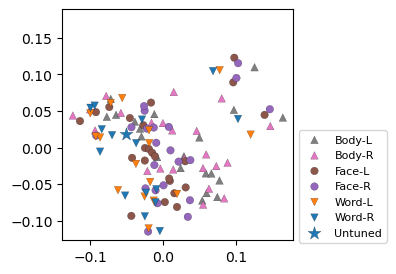

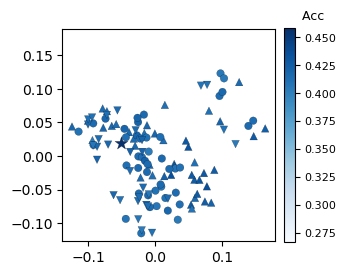

In [30]:
keep_models = (model_labels != 3) & (model_labels != 0) & (model_labels != -1) & (model_type !=2) & (model_type !=1.5)

D0 = np.maximum(0,D2[keep_models][:,keep_models]) # numeric error for small negatives
color_val = model_acc[keep_models]
print(keep_models.shape)

# use_for_color = (model_labels != -2 )  & (model_labels != -1 ) &(model_labels != 0) &  (model_type !=2) 
# vmin, vmax = min(model_acc[use_for_color]), max(model_acc[use_for_color])



C = (D0-np.mean(D0,axis=0,keepdims=True))
C -= np.mean(C,axis=1,keepdims=True)

eigva, eigve = np.linalg.eigh(-0.5*C)

v = np.argsort(eigva)[::-1]

Z = eigve[:,v[0:2]]@np.diag(np.sqrt(eigva[v[0:2]]))

fig = plt.figure(figsize=(3,3))
for i,k in enumerate(lr_markers):
    idx=lr_model_labels[keep_models]==k
    if np.sum(idx)>0:
        if k==-2:
            marker_size=100
        else:
            marker_size=30
#        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=color_val[idx],marker=markers[k],label=model_strs[k]+label_add,vmin=vmin,vmax=vmax)
        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=i*np.ones(np.sum(idx)),marker=lr_markers[k],
                    label=lr_model_strs[k],vmin=0,vmax=10,cmap='tab10_r',edgecolors='k',linewidth=0.125)
plt.legend(prop={'size': 8}, bbox_to_anchor=(1, 0.5))
plt.axis('square')

plt.savefig(adir+'higher_not_place_lr_landscape_key.pdf',  bbox_inches='tight')

fig = plt.figure(figsize=(3,3))
for i,k in enumerate(lr_markers):
    idx=lr_model_labels[keep_models]==k
    if np.sum(idx)>0:
        if k==-2:
            marker_size=100
        else:
            marker_size=30
        plt.scatter(Z[idx,0],Z[idx,1],s=marker_size,c=color_val[idx],marker=lr_markers[k],cmap="Blues",label=lr_model_strs[k]+label_add,vmin=vmin,vmax=vmax,edgecolors='k',linewidth=0.125)
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=8) 
cbar.ax.set_title("            Acc",fontsize=9)
plt.axis('square')

plt.savefig(adir+'higher_not_place_lr_landscape.pdf',  bbox_inches='tight')